# Course Machine Learning for Particle Physicists
##  PhD course Spring 2020
## Example I : Regression
###  by Veronica Sanz (Universitat de Valencia/ IFIC)



In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("seaborn-deep")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The [dataset](https://www.kaggle.com/c/bike-sharing-demand/data) we will use is from a [Kaggle](https://www.kaggle.com) competition. 

You will have to sign up for Kaggle to download it, or just follow this  [link](https://www.dropbox.com/s/qxuigvghpcn8il1/train.csv?dl=0) to download it. 

Some parts of this notebook have been taken from this [Git](https://git.generalassemb.ly/benbell/10-linear-regression/blob/master/solution-code/linear_regression-solution.ipynb) example.

In [0]:
# Read the data and set the datetime as the index. Remeber to change your file path.
myfile = 'gdrive/My Drive/ML/bike-sharing-dataset/train.csv'
bikes = pd.read_csv(myfile, index_col='datetime', parse_dates=True)
#read_csv is a function of the pandas class. read_excel likewise

In [36]:
# Preview the first five rows of the DataFrame.
#bikes.tail(10)
bikes.head(5)
#print(len(bikes))
#print(bikes.season.head(2))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### From the Kaggle competition:
######  datetime - hourly date + timestamp  
######  season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
######  holiday - whether the day is considered a holiday
######  workingday - whether the day is neither a weekend nor holiday
######  weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
######  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
######  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
######  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
######  temp - temperature in Celsius
######  atemp - "feels like" temperature in Celsius
######  humidity - relative humidity
######  windspeed - wind speed
######  casual - number of non-registered user rentals initiated
######  registered - number of registered user rentals initiated
######  count - number of total rentals

In [0]:
# Use the .rename() method to rename count to total.
bikes.rename(columns={'count':'total_rentals'}, inplace=True)


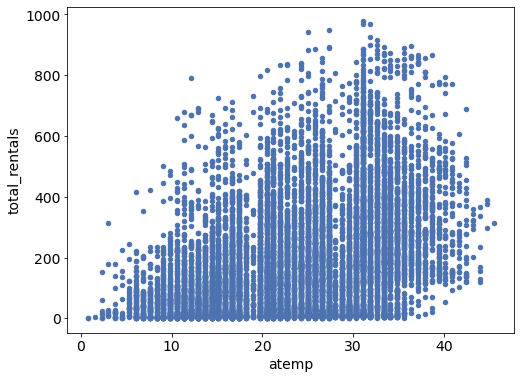

In [57]:
# Pandas scatterplot
bikes.plot(kind='scatter', x='atemp', y='total_rentals', alpha=1);
#bikes.plot(kind='hexbin', x='temp', y='total_rentals', alpha=1);
#bikes.plot(kind='hist', x='temp', y='total_rentals', alpha=1);
#alpha is the opacity

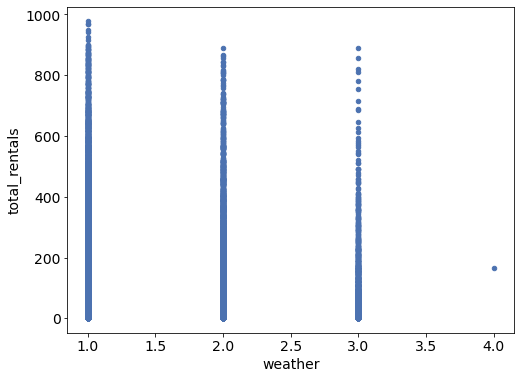

In [32]:
# Pandas scatterplot
bikes.plot(kind='scatter', x='weather', y='total_rentals', alpha=1);

One-feature model

In [0]:
# Create X and y.
feature_cols = ['atemp']
X = bikes[feature_cols] #selecting a column]
#X = bikes.temp 
y = bikes['total_rentals'] # bikes.temp = bikes['temp'] given temp has no space within

In [55]:
print((X.shape),(y.shape))
print(len(X), len(y)) 



(10886, 1) (10886,)
10886 10886


In [51]:
from sklearn.linear_model import LinearRegression
# Make an instance of a LinearRegression object.
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [52]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
lr.fit(X, y)
# Print the coefficients.
#print(lr.fit_intercept)
print(lr.intercept_)
print(lr.coef_)
#fits X_i and y_i and finds m and c of f(X_i) = mX_i + c  (gradient dissent method)
#model set 

-5.5114213685680795
[8.33163614]


In [65]:
X_new = [[0], [10], [20]] #choosing to new values of x = 0, 10
lr.predict(X_new) #predicts y_new according to the model equation

array([ -5.51142137,  77.80494007, 161.12130151])

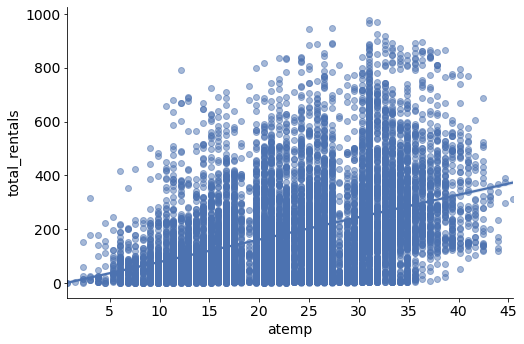

In [68]:
# Seaborn scatterplot with regression line
sns.lmplot(x='atemp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.5});
#sns predicts a fit 

More features

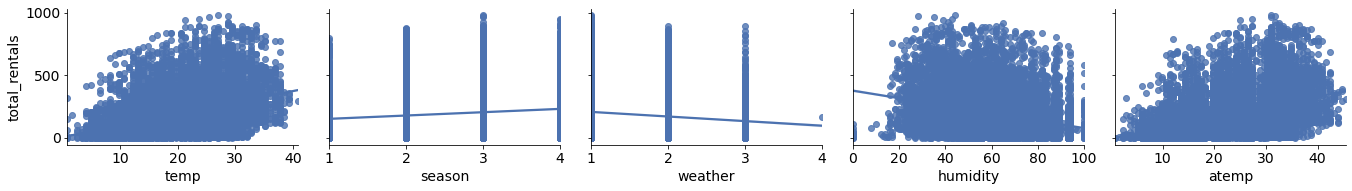

In [71]:
# Create feature column variables
feature_cols = ['temp', 'season', 'weather', 'humidity', 'atemp']
#making an array of features colums
# Multiple scatterplots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total_rentals', kind='reg',aspect=1.5);

now with Pandas

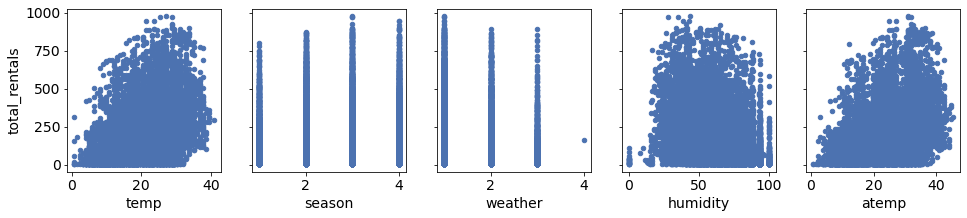

In [76]:
# Multiple scatterplots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
# 1 = no of rows in the figure
#len(fi..) = # of columns
#sharey = y axis range same
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total_rentals', ax=axs[index], figsize=(16, 3))

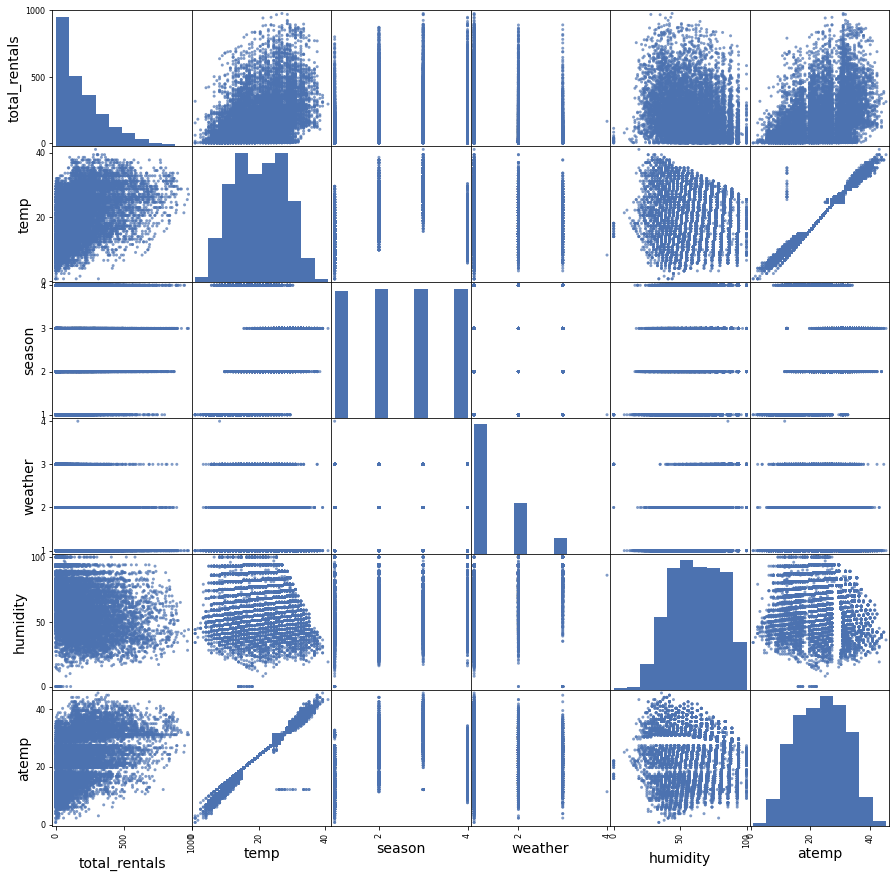

In [78]:
# alternative way in Pandas (might take a while)
# scatter_matrix does a pairplot of *every* column

grr = pd.plotting.scatter_matrix(bikes[['total_rentals'] + feature_cols], figsize=(15, 15), alpha=0.7)

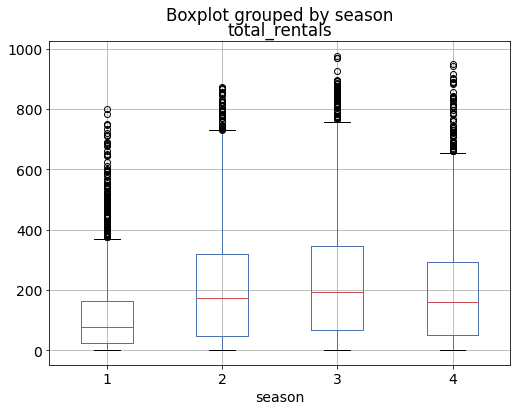

In [80]:
# Box plot of rentals, grouped by season.
bikes.boxplot(column='total_rentals', by='season');
#outliers

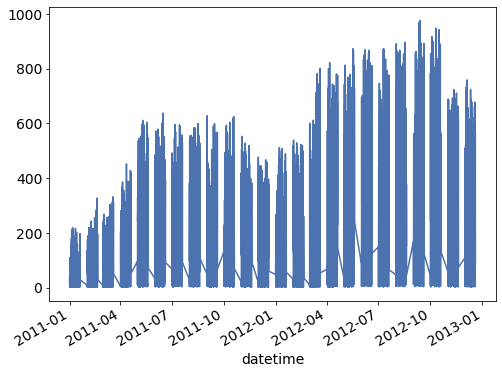

In [82]:
# Line plot of rentals
bikes.total_rentals.plot();
#bikes.total_rentals selects the column

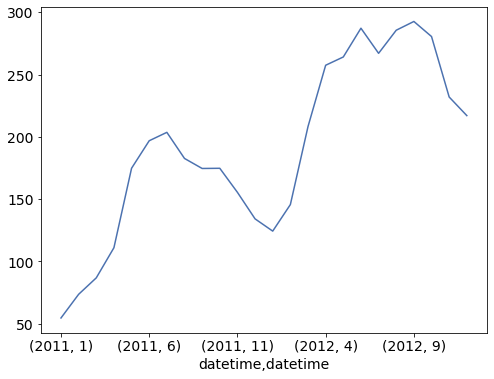

In [84]:
bikes.groupby([bikes.index.year, bikes.index.month]).mean().total_rentals.plot()

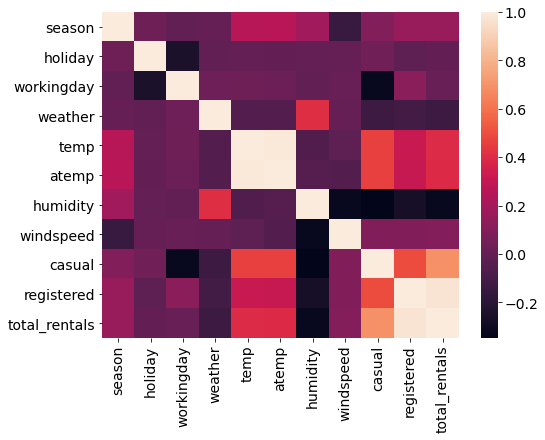

In [89]:

# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(bikes.corr())
#bikes.corr() calculates the corr. coeff and heatmap draws

                   temp     atemp  humidity  total_rentals
temp           1.000000  0.984948 -0.064949       0.394454
atemp          0.984948  1.000000 -0.043536       0.389784
humidity      -0.064949 -0.043536  1.000000      -0.317371
total_rentals  0.394454  0.389784 -0.317371       1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


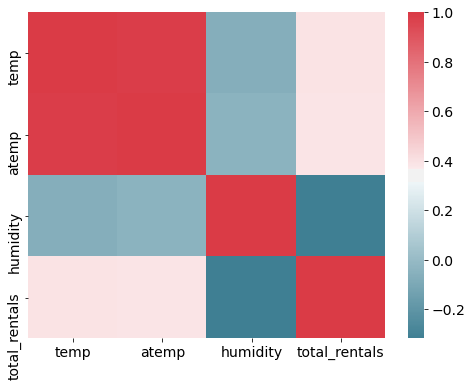

In [93]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'humidity','total_rentals']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))
#sns.heatmap(correlations)

In [99]:
# Create X and y.
X = bikes[feature_cols]
y = bikes.total_rentals

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y) #training data

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
#y = f(X) = m1X1 + m2X2 + ... m5X5 + c ; mult. lin. reg.

152.47810701943436
[ 2.64719803 22.32958394  7.38023014 -3.1698383   4.87299197]


In [100]:
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

[('temp', 2.6471980323951962),
 ('season', 22.329583935871792),
 ('weather', 7.380230143705455),
 ('humidity', -3.169838296580771),
 ('atemp', 4.872991968332677)]

In [0]:
from sklearn.model_selection import train_test_split
#to split the data for training and testing
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols): #df = dataframe = bikes
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    print(linreg.intercept_)
    print(linreg.coef_)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [125]:
# Compare different sets of features.
import sklearn.metrics as metrics
print(train_test_rmse(bikes, ['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(bikes, ['temp', 'season', 'weather']))
print(train_test_rmse(bikes, ['temp', 'season', 'humidity']))
#calculates errors based on different combinations Xi 

153.94712763278267
[ 8.03803643 22.88926603  8.4022249  -3.12931968]
155.64945913079674
25.541536893719183
[  8.76325865  11.6599608  -28.39700556]
164.1653997629182
159.91245556557587
[ 8.02647018 22.58978788 -3.01735767]
155.59818936691417


#### Comparing Testing RMSE With Null RMSE
The null RMSE is the RMSE that corresponds to always predicting the ypred=y_mean.  It is a benchmark against you want to do better.

In [119]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)
print(y_null) #np.zeroes_like creates an array of len(y_test)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
print(y_null)

# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

[0. 0. 0. ... 0. 0. 0.]
[192.26451139 192.26451139 192.26451139 ... 192.26451139 192.26451139
 192.26451139]


179.57906896465727

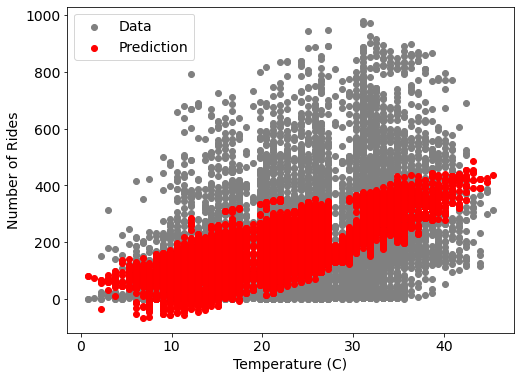

In [134]:

plt.scatter(X['atemp'], y,  color='gray',label="Data") #prints total dataset
#plt.scatter(X_train['atemp'], y_train,  color='gray',label="Data")
 #print seggregated data used to train
plt.scatter(X['atemp'], linreg.predict(X), color='red',label="Prediction")
 #X_test data points not used for training

plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()

Feature engineering

There are some entries which are categorical (take discrete values):
weather, holiday/nonholiday, season

Weather 1 to 4 is ordered in a way that 'makes sense', the higher value has a clear meaning.

But what about season 1-4? The value 4 of Winter is bigger than the value 1 of Spring, but this  does not have a clear relation with the problem at hand. These values (bigger/smaller) are artificial. In this case we can do the next procedure using get_dummies


In [141]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')
# Print five random rows.
season_dummies.sample(n=5, random_state=123)

,season_1,season_2,season_3,season_4
datetime,,,,
2012-03-07 21:00:00,1,0,0,0
2012-04-12 03:00:00,0,1,0,0
2011-02-06 10:00:00,1,0,0,0
2011-12-05 23:00:00,0,0,0,1
2011-08-08 14:00:00,0,0,1,0


We  just three dummy variables (not four), as Spring (season 1) is the baseline level. The information gained from three features is directly correlated to the fourth. So we drop the 1st column, and then concatenate



In [0]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

In [149]:
# Print five random rows.
season_dummies.sample(n=5, random_state=123)

,season_2,season_3,season_4
datetime,,,
2012-03-07 21:00:00,0,0,0
2012-04-12 03:00:00,1,0,0
2011-02-06 10:00:00,0,0,0
2011-12-05 23:00:00,0,0,1
2011-08-08 14:00:00,0,1,0


In [150]:
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
bikes_dummies = pd.concat([bikes, season_dummies], axis=1)
#concat is addition of bikes and season_dummies df
# Print five random rows.
bikes_dummies.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [155]:
# Include dummy variables for season in the model.
feature_cols = ['atemp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('atemp', 9.626764322120547),
 ('season_2', 2.43583280708825),
 ('season_3', -25.479562836878003),
 ('season_4', 65.29425445155212),
 ('humidity', -2.9522040964020597)]

In [157]:
# Compare original season variable with dummy variables.
print(train_test_rmse(bikes_dummies, ['atemp', 'season', 'humidity']))
print(train_test_rmse(bikes_dummies, ['atemp', 'season_2', 'season_3', 'season_4', 'humidity']))
#prints out intercept, coeff_ and RMSE

151.56633643392422
[ 7.4212284  22.33695648 -3.08408095]
155.62881073938377
129.47824810078075
[  9.97489202  -0.1460044  -29.93575259  64.8606388   -2.93608887]
154.79073678198287


Not a huge gain! Now let's use the time.

In [164]:
bikes['hour'] = bikes.index.hour
#index is a datetime object and not character
# Encode hour as a categorical feature.
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)
bikes.sample(n=5, random_state=123)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,hour,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-07 21:00:00,1,0,1,1,18.04,21.970,62,16.9979,11,177,188,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2012-04-12 03:00:00,2,0,1,1,13.12,15.150,61,16.9979,2,3,5,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-02-06 10:00:00,1,0,0,1,12.30,14.395,52,16.9979,15,74,89,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2011-12-05 23:00:00,4,0,1,2,18.86,22.725,88,8.9981,8,54,62,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2011-08-08 14:00:00,3,0,1,1,33.62,37.120,43,19.9995,41,109,150,14,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [166]:
# Generate a daytime variable based on hour of the day. This is a rougher feature than time
bikes['daytime'] = bikes.hour.apply(lambda x: int((x < 21) and (x > 6)))
#  and test if you gained anything
print(train_test_rmse(bikes, ['hour']))
print(train_test_rmse(bikes, bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(bikes, ['daytime']))

69.49368464609842
[10.62543989]
165.67174264111398
42.705277169586
[-6.45797618e+14  7.22287237e+14  9.93484137e+14 ...  1.74398911e+14
  3.19827659e+14  3.06574505e+14]
128.65322441258985
62.74699501612429
[220.88481647]
144.89116360237938


The best predictions can be obtained using the hour information.

In [175]:
bikes_dummies['hour'] = bikes.index.hour
#takes hour data from index and makes a column hour in bikes_dimmies df
bikes_dummies.sample(n=5, random_state=123)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,season_2,season_3,season_4,hour
datetime,,,,,,,,,,,,,,,
2012-03-07 21:00:00,1,0,1,1,18.04,21.970,62,16.9979,11,177,188,0,0,0,21
2012-04-12 03:00:00,2,0,1,1,13.12,15.150,61,16.9979,2,3,5,1,0,0,3
2011-02-06 10:00:00,1,0,0,1,12.30,14.395,52,16.9979,15,74,89,0,0,0,10
2011-12-05 23:00:00,4,0,1,2,18.86,22.725,88,8.9981,8,54,62,0,0,1,23
2011-08-08 14:00:00,3,0,1,1,33.62,37.120,43,19.9995,41,109,150,0,1,0,14


In [180]:
feature_cols = ['atemp', 'season_2', 'season_3', 'season_4', 'humidity','hour']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals

linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('atemp', 7.9024944450882035),
 ('season_2', 20.05705707701869),
 ('season_3', 0.10058348579083543),
 ('season_4', 68.01082421830478),
 ('humidity', -2.281849323202019),
 ('hour', 7.38457508426421)]

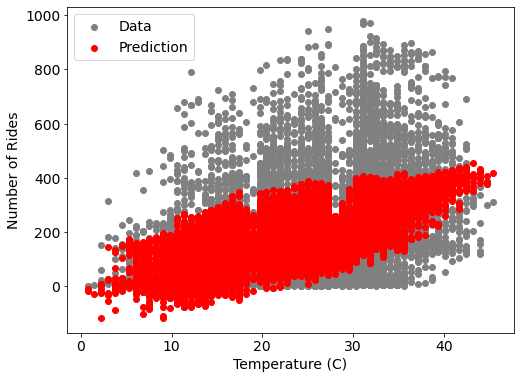

In [181]:
plt.scatter(X['atemp'], y,  color='gray',label="Data")
plt.scatter(X['atemp'], linreg.predict(X), color='red',label="Prediction")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()

Regularization

General advice: Features should be normalized [see here about preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

How should you choose between lasso regression and ridge regression?

Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.

Ridge can work particularly well if there is a high degree of multicollinearity in your model.

If model performance is your primary concern, it is best to try both.

Elastic net regression is a combination of Lasso regression and Ridge Regression.


In [0]:
# Include dummy variables for season in the model.
feature_cols = ['temp', 'atemp', 'season_2', 'season_3', 'season_4', 'humidity','hour']
X = bikes_dummies[feature_cols]
y = bikes_dummies.total_rentals
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [188]:
# alpha=0 is equivalent to linear regression.
from sklearn.linear_model import Ridge
#now fitting with Ridge module, which has the functionality of regularisation
# Instantiate the model.
#(Alpha of zero has no regularization strength, essentially a basic linear regression.)
ridgereg = Ridge(alpha=0, normalize=True)

# Fit the model.
ridgereg.fit(X_train, y_train)

# Predict with fitted model.
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

149.72395128926354


In [189]:
# Coefficients for a non-regularized linear regression
list(zip(feature_cols, ridgereg.coef_))

[('temp', 6.6323519691503146),
 ('atemp', 2.325054682937832),
 ('season_2', 11.013184230539279),
 ('season_3', -10.745586761079576),
 ('season_4', 65.20891445321644),
 ('humidity', -2.207304452132091),
 ('hour', 7.392899349386931)]

In [194]:
# Try alpha=0.1.
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

149.9343813073781


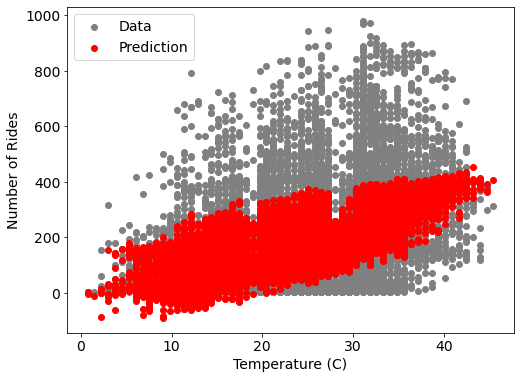

In [197]:
plt.scatter(X['atemp'], y,  color='gray',label="Data")
plt.scatter(X['atemp'], ridgereg.predict(X), color='red',label="Prediction")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rides")
plt.legend(loc='upper left')
plt.show()